In [83]:
def process_input(_df):
    for col in ['LiefZeitV', 'LiefZeitB']:
        _df[col] = pd.to_datetime(_df[col], errors='coerce').dt.time
    _df['AddDatum'] = _df['AddDatum'].apply(lambda x: str(x).split(' '))
    return _df

In [84]:
import pandas as pd

dfs = [
    pd.read_csv("data/MMX_Hackathon2025_year2021.csv", encoding="ISO-8859-1", sep = ';'),
    pd.read_csv("data/MMX_Hackathon2025_year2025Q1.csv", encoding="ISO-8859-1", sep = ';'),
    process_input(pd.read_excel("data/MMX_Hackathon2025_year2022.xlsx")),
    process_input(pd.read_excel("data/MMX_Hackathon2025_year2023.xlsx")),
    process_input(pd.read_excel("data/MMX_Hackathon2025_year2024.xlsx"))
]


In [85]:
comb = pd.concat(dfs)

In [109]:
comb.to_csv("data/combined.csv", index=False)

In [101]:
comb['LiefDatum'] = comb['LiefDatum'].astype(str).replace('.', '-')

In [108]:
comb['LiefDatum'] = comb['LiefDatum'].astype(str).apply(lambda x:x.replace('.', '-'))

In [118]:
_df

,LiefKWJ,Monat,LiefDatum,LiefZeitV,LiefZeitB,CVgId,Typ,LoAdrId,LoPlz,LoOrt,...,CSAnz,CHAnz,FzgNr,Bez,Plz,Ort,AddDatum,EntPlz,EntOrt,day
0,2021,1,04-01-2021,NaN,NaN,6263696,Privat,1967009,25554.0,Nortorf,...,0,1,SM310,Gipskartonplatten,25436.0,Tornesch,16.12.2020 10:58,NaN,NaN,04
1,2021,1,04-01-2021,NaN,NaN,6275002,Firma,1962585,24103.0,Kiel,...,0,1,0494,Bauschutt < 60 cm,24145.0,Kiel,29.12.2020 09:06,NaN,NaN,04
2,2021,1,04-01-2021,07:00:00,10:00:00,6261394,Privat,1966631,25551.0,Hohenlockstedt,...,1,0,SM310,Baustellenabfälle zur Vorbehandlung,NaN,NaN,15.12.2020 10:29,NaN,NaN,04
3,2021,1,04-01-2021,08:00:00,12:00:00,6274886,Privat,1968481,22415.0,Hamburg,...,1,0,0236,Sperrmüll zur Verwertung,NaN,NaN,28.12.2020 16:29,NaN,NaN,04
4,2021,1,04-01-2021,11:00:00,14:00:00,6261302,Firma,1969116,20251.0,Hamburg,...,1,0,0177,Baustellenabfälle zur Vorbehandlung,NaN,NaN,15.12.2020 09:56,NaN,NaN,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105572,2021,12,31-12-2021,NaN,NaN,6759759,Firma,1742999,22525.0,Hamburg,...,1,1,0179,Alt- und Bauholz unbehandelt A1,22525.0,Hamburg,30.12.2021 10:01,NaN,NaN,31
105573,2021,12,31-12-2021,08:00:00,10:00:00,6751484,Firma,1879376,20251.0,Hamburg,...,0,1,0190,Kunststofffraktion zur energet. Verwertung,22525.0,Hamburg,21.12.2021 08:19,NaN,NaN,31
105574,2021,12,31-12-2021,07:30:00,09:00:00,6729501,Firma,1174504,22525.0,Hamburg,...,1,1,0162,Gewerbeabfall zur Vorbehandlung (DB),22525.0,Hamburg,05.12.2021 16:58,NaN,NaN,31
105575,2021,12,31-12-2021,NaN,00:00:00,6729585,Firma,1638825,22335.0,Hamburg,...,1,1,0190,Gewerbeabfall zur Vorbehandlung (DB),22525.0,Hamburg,05.12.2021 17:07,NaN,NaN,31


In [138]:
_df = comb.query("LiefKWJ == 2021")
_df['day'] = _df['LiefDatum'].apply(
    lambda x:x.split('-')[0]
)
_df['Monat'] = _df['Monat'].astype(str).str.zfill(2)
_df['LiefDatum'] = _df['LiefKWJ'].astype(str) + '-' + _df['Monat'].astype(str) + '-' + _df['day'].astype(str)
_df['LiefDatum'] = pd.to_datetime(_df['LiefDatum'])
_df2021 = _df.copy()

/var/folders/v_/88dt58ws2p1_5mlvcpxlgbtc0000gn/T/ipykernel_26504/2382949274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['day'] = _df['LiefDatum'].apply(
/var/folders/v_/88dt58ws2p1_5mlvcpxlgbtc0000gn/T/ipykernel_26504/2382949274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['Monat'] = _df['Monat'].astype(str).str.zfill(2)
/var/folders/v_/88dt58ws2p1_5mlvcpxlgbtc0000gn/T/ipykernel_26504/2382949274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [139]:
_df = comb.query("LiefKWJ == 2025")
_df['day'] = _df['LiefDatum'].apply(
    lambda x:x.split('-')[0]
)
_df['Monat'] = _df['Monat'].astype(str).str.zfill(2)
_df['LiefDatum'] = _df['LiefKWJ'].astype(str) + '-' + _df['Monat'].astype(str) + '-' + _df['day'].astype(str)
_df['LiefDatum'] = pd.to_datetime(_df['LiefDatum'])
_df2025 = _df.copy()

/var/folders/v_/88dt58ws2p1_5mlvcpxlgbtc0000gn/T/ipykernel_26504/2838535545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['day'] = _df['LiefDatum'].apply(
/var/folders/v_/88dt58ws2p1_5mlvcpxlgbtc0000gn/T/ipykernel_26504/2838535545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['Monat'] = _df['Monat'].astype(str).str.zfill(2)
/var/folders/v_/88dt58ws2p1_5mlvcpxlgbtc0000gn/T/ipykernel_26504/2838535545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [141]:
comb1 = pd.concat(
    [
        _df2021,
        _df2025,
        comb.query("LiefKWJ == 2022"),
        comb.query("LiefKWJ == 2023"),
        comb.query("LiefKWJ == 2024"),
    ]
)

In [147]:
comb1.to_csv("data/combined.csv", index=False)

In [30]:
df = pd.read_csv("data/combined.csv")

/var/folders/v_/88dt58ws2p1_5mlvcpxlgbtc0000gn/T/ipykernel_26504/873109491.py:1: DtypeWarning: Columns (19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/combined.csv")


In [148]:
comb1.query("LiefKWJ == 2025")

,LiefKWJ,Monat,LiefDatum,LiefZeitV,LiefZeitB,CVgId,Typ,LoAdrId,LoPlz,LoOrt,...,CSAnz,CHAnz,FzgNr,Bez,Plz,Ort,AddDatum,EntPlz,EntOrt,day
0,2025,01,2025-01-01 00:00:00,NaN,NaN,8189637,Firma,2231785,25566.0,Lägerdorf,...,1,1,SM343,NaN,NaN,NaN,26.11.2024 11:14,NaN,NaN,01
1,2025,01,2025-01-01 00:00:00,NaN,NaN,8230253,Firma,2231785,25566.0,Lägerdorf,...,1,1,SM343,NaN,NaN,NaN,27.12.2024 07:24,NaN,NaN,01
2,2025,01,2025-01-02 00:00:00,NaN,NaN,8218849,Privat,2314239,25587.0,Münsterdorf,...,0,1,SM347,Sperrmüll zur Verwertung,25524.0,Itzehoe,16.12.2024 16:05,NaN,NaN,02
3,2025,01,2025-01-02 00:00:00,NaN,NaN,8222337,Firma,1792468,24113.0,Kiel,...,0,1,0499,Baustellenabfälle zur Vorbehandlung,24145.0,Kiel,18.12.2024 11:13,NaN,NaN,02
4,2025,01,2025-01-02 00:00:00,NaN,NaN,8222339,Privat,2314892,25348.0,Glückstadt,...,0,1,SM962,Sperrmüll zur Verwertung,25524.0,Itzehoe,18.12.2024 11:15,NaN,NaN,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25221,2025,03,2025-03-31 00:00:00,12:00:00,16:00:00,8353075,Firma,2306691,25704.0,Meldorf,...,1,1,SM862,Beton < 60 cm,25704.0,Bargenstedt,27.03.2025 13:18,NaN,NaN,31
25222,2025,03,2025-03-31 00:00:00,12:00:00,16:00:00,8353076,Firma,2306691,25704.0,Meldorf,...,1,1,SM862,Beton < 60 cm,25704.0,Bargenstedt,27.03.2025 13:18,NaN,NaN,31
25223,2025,03,2025-03-31 00:00:00,13:00:00,17:00:00,8354771,Firma,1869007,20539.0,Hamburg,...,1,1,RathmM1,Baustellenabfälle zur Vorbehandlung,20539.0,Hamburg,28.03.2025 11:21,NaN,NaN,31
25224,2025,03,2025-03-31 00:00:00,14:00:00,NaN,8351506,Firma,2075814,22303.0,Hamburg,...,1,1,0230,Beton < 60 cm,22525.0,Hamburg,26.03.2025 15:30,NaN,NaN,31


In [50]:
df.zip_code_of_disposal_facility.unique()

array([   nan, 22525., 20539., 21218., 25436., 22113., 25524., 19243.,
       22880., 21129., 25541., 21465., 24145., 20457., 22145., 27404.,
       24558., 24768., 24114., 25348., 21079., 21357., 21502., 23923.,
       25569., 24539., 22769., 24623., 21107., 18299., 29640., 24568.,
       25566., 24594., 21614., 22885., 25591., 25582., 19217., 25364.,
       25704., 24118., 24955., 23730., 24837., 18211., 25785., 28307.,
       24149., 24239., 24161., 25551., 21397., 30449., 28197., 25482.,
       24619., 24582., 23556., 28237., 25335., 25365., 24103., 25421.,
        4356., 21224., 24211., 24220., 26169., 22047., 19273., 21481.,
       19075., 21439., 21029., 30629., 24241., 28239., 24816., 21737.,
       20537., 22457., 21244., 23936., 22851., 18230., 31618., 24787.,
       41748., 13407., 23560., 19209., 24340., 21220., 27777., 27356.])

In [51]:
column_renaming = {
    "LiefKWJ": "year_of_delivery",
    "Monat": "month_of_delivery",
    "LiefDatum": "date_of_delivery",
    "LiefZeitV": "earliest_possible_delivery_time",
    "LiefZeitB": "latest_possible_delivery_time",
    "CVgId": "unique_order_id",
    "Typ": "customer_type",
    "LoAdrId": "unique_customer_construction_id",
    "LoPlz": "zip_code_of_site",
    "LoOrt": "location_of_site",
    "DspGrpKz": "vehicle_group",
    "DspZenKz": "source_of_delivery",
    "AArtKz": "order_type",
    "ConTyp": "container_type",
    "CSAnz":"number_of_containers_dropped",
    "CHAnz": "number_of_containers_picked",
    "FzgNr": "unique_vehicle_id",
    "Bez": "type_of_waste",
    "Plz": "zip_code_of_site_or_container_yard",
    "Ort": "city_of_site_or_container_yard",
    "AddDatum": "date_of_order_entry",
    "EntPlz": "zip_code_of_disposal_facility",
    "EntOrt": "location_of_disposal_facility"
}

In [52]:
df.rename(columns=column_renaming, inplace=True)

In [54]:
    try:
        df['delivery_date'] = pd.to_datetime(
            df['delivery_date'].astype(str).apply(lambda x: x.replace('.','-')),
            format='mixed',
            dayfirst=True,
            errors='coerce'
        )
        if df['delivery_date'].isna().any():
            st.warning("Some delivery dates could not be parsed and were set to NaT")
    except Exception as e:
        st.error(f"Error parsing delivery dates: {str(e)}")
        df['delivery_date'] = pd.NaT


,year_of_delivery,month_of_delivery,date_of_delivery,earliest_possible_delivery_time,latest_possible_delivery_time,unique_order_id,customer_type,unique_customer_construction_id,zip_code_of_site,location_of_site,...,container_type,number_of_containers_dropped,number_of_containers_picked,unique_vehicle_id,type_of_waste,zip_code_of_site_or_container_yard,city_of_site_or_container_yard,date_of_order_entry,zip_code_of_disposal_facility,location_of_disposal_facility
0,2021,1,04.01.2021,NaN,NaN,6263696,Privat,1967009,25554.0,Nortorf,...,C07,0,1,SM310,Gipskartonplatten,25436.0,Tornesch,16.12.2020 10:58,NaN,NaN
1,2021,1,04.01.2021,NaN,NaN,6275002,Firma,1962585,24103.0,Kiel,...,C07,0,1,0494,Bauschutt < 60 cm,24145.0,Kiel,29.12.2020 09:06,NaN,NaN
2,2021,1,04.01.2021,07:00:00,10:00:00,6261394,Privat,1966631,25551.0,Hohenlockstedt,...,C07,1,0,SM310,Baustellenabfälle zur Vorbehandlung,NaN,NaN,15.12.2020 10:29,NaN,NaN
3,2021,1,04.01.2021,08:00:00,12:00:00,6274886,Privat,1968481,22415.0,Hamburg,...,C07,1,0,0236,Sperrmüll zur Verwertung,NaN,NaN,28.12.2020 16:29,NaN,NaN
4,2021,1,04.01.2021,11:00:00,14:00:00,6261302,Firma,1969116,20251.0,Hamburg,...,C07,1,0,0177,Baustellenabfälle zur Vorbehandlung,NaN,NaN,15.12.2020 09:56,NaN,NaN


In [41]:
{
    "customer_type": {
        "Firma": "company",
        "Privat": "private",
        "Verein": "association",
        "AöR/KöR": "public_customer"
    },
    "vehicle_group": {
        "M": "mulde_skip_container",
        "C": "container_roll-off_container"
    },
    "source_of_delivery": {
        "HH": "hamburg_1",
        "KIE": "kiel",
        "SME": "itzehoe"
    }
}

{'customer_type': {'Firma': 'company',
  'Privat': 'private',
  'Verein': 'association',
  'AöR/KöR': 'public_customer'},
 'vehicle_group': {'M': 'mulde_skip_container'},
 'source_of_delivery': {'1': 'customer', '2': 'customer_and_supplier'}}

In [60]:
df['order_type_action'] = df['order_type'].copy()
df['order_type_action'] = df['order_type_action'].replace({
    "H": 1,
    "L": 0,
    "S": -1,
    "W": 0,
    "T": 1,
    "R": 0
})

/var/folders/v_/88dt58ws2p1_5mlvcpxlgbtc0000gn/T/ipykernel_26504/972100581.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['order_type_action'] = df['order_type_action'].replace({


In [62]:
df.groupby(['order_type']).count()

,year_of_delivery,month_of_delivery,date_of_delivery,earliest_possible_delivery_time,latest_possible_delivery_time,unique_order_id,customer_type,unique_customer_construction_id,zip_code_of_site,location_of_site,...,number_of_containers_dropped,number_of_containers_picked,unique_vehicle_id,type_of_waste,zip_code_of_site_or_container_yard,city_of_site_or_container_yard,date_of_order_entry,zip_code_of_disposal_facility,location_of_disposal_facility,order_type_action
order_type,,,,,,,,,,,,,,,,,,,,,
H,82493,82493,82493,35473,35429,82493,82404,82493,82467,82488,...,82493,82493,82492,80653,43378,43378,82493,37270,37270,82493
L,53360,53360,53360,24796,24020,53360,53358,53360,53358,53360,...,53360,53360,53360,53327,27023,27023,53360,26296,26296,53360
R,32955,32955,32955,8747,11542,32955,32451,32955,32955,32955,...,32955,32955,32953,32955,17529,17529,32955,15426,15426,32955
S,83458,83458,83458,47695,50150,83458,83359,83458,83429,83453,...,83458,83458,83454,81513,2525,2525,83458,262,262,83458
T,20078,20078,20078,14096,14297,20078,20062,20078,20076,20076,...,20078,20078,20078,19221,9115,9115,20078,10104,10104,20078
W,163815,163815,163815,89399,92625,163815,163782,163815,163806,163815,...,163815,163815,163811,163712,88194,88194,163815,75490,75490,163815


In [82]:
comb1 = pd.read_csv("data/combined.csv")

/var/folders/v_/88dt58ws2p1_5mlvcpxlgbtc0000gn/T/ipykernel_37821/1930555573.py:1: DtypeWarning: Columns (19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  comb1 = pd.read_csv("data/combined.csv")


In [86]:
_df = comb1.query("LiefKWJ == 2025")

In [95]:
_df['LiefDatum'] = pd.to_datetime(_df['LiefDatum'])
_df.query("LiefDatum == '2025-03-25'").query('DspZenKz == "HH"').sort_values("CSAnz", ascending = False)

/var/folders/v_/88dt58ws2p1_5mlvcpxlgbtc0000gn/T/ipykernel_37821/3284007468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['LiefDatum'] = pd.to_datetime(_df['LiefDatum'])
/var/folders/v_/88dt58ws2p1_5mlvcpxlgbtc0000gn/T/ipykernel_37821/3284007468.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  _df.query("LiefDatum == '2025-03-25'").query('DspZenKz == "HH"').sort_values("CSAnz", ascending = False)


,LiefKWJ,Monat,LiefDatum,LiefZeitV,LiefZeitB,CVgId,Typ,LoAdrId,LoPlz,LoOrt,...,CSAnz,CHAnz,FzgNr,Bez,Plz,Ort,AddDatum,EntPlz,EntOrt,day
128726,2025,3,2025-03-25,NaN,NaN,8352443,Firma,2272228,20457.0,Hamburg,...,9,9,0264,Gewerbeabfall zur Vorbehandlung,20457.0,Hamburg,27.03.2025 08:48,NaN,NaN,25.0
128768,2025,3,2025-03-25,NaN,NaN,8346144,Firma,1837796,22525.0,Hamburg,...,2,2,0271,Mineralfaserabfall m. sch. Verunr. in transp. ...,24955.0,Harrislee,24.03.2025 10:37,NaN,NaN,25.0
128767,2025,3,2025-03-25,NaN,NaN,8346138,Firma,1837796,22525.0,Hamburg,...,2,2,0240,Mineralfaserabfall m. sch. Verunr. in transp. ...,18299.0,Laage,24.03.2025 10:28,NaN,NaN,25.0
128947,2025,3,2025-03-25,07:00:00,07:00:00,8313999,Firma,1718566,22969.0,Witzhave,...,2,2,0196,Kunststofffraktion zur energet. Verwertung,20539.0,Hamburg,01.03.2025 10:21,NaN,NaN,25.0
128763,2025,3,2025-03-25,NaN,NaN,8339722,Firma,1254046,25436.0,Tornesch,...,2,2,0232,Mineralfaserabfall m. sch. Verunr. in transp. ...,24955.0,Harrislee,19.03.2025 08:27,NaN,NaN,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128686,2025,3,2025-03-25,07:00:00,10:00:00,8345908,Firma,2312401,22880.0,Wedel,...,0,1,0235,Baustellenabfälle zur Vorbehandlung,25436.0,Tornesch,24.03.2025 09:14,NaN,NaN,25.0
128685,2025,3,2025-03-25,07:00:00,10:00:00,8345548,Firma,2127282,22113.0,Hamburg,...,0,1,0243,Boden unbeprobt zur Verwertung,22113.0,Hamburg,24.03.2025 06:45,NaN,NaN,25.0
128684,2025,3,2025-03-25,07:00:00,10:00:00,8345454,Firma,2119611,20539.0,Hamburg,...,0,1,0261,Alt- und Bauholz behandelt A2,20539.0,Hamburg,24.03.2025 05:56,NaN,NaN,25.0
128683,2025,3,2025-03-25,07:00:00,10:00:00,8341154,Firma,2316046,24568.0,Kaltenkirchen,...,0,1,SM962,Asbestzementabfälle in 1-cbm-Big Bags verpackt,25436.0,Tornesch,19.03.2025 14:37,NaN,NaN,25.0


In [70]:
df.query("year_of_delivery == 2024").sort_values("month_of_delivery", ascending=False)

,year_of_delivery,month_of_delivery,date_of_delivery,earliest_possible_delivery_time,latest_possible_delivery_time,unique_order_id,customer_type,unique_customer_construction_id,zip_code_of_site,location_of_site,...,number_of_containers_dropped,number_of_containers_picked,unique_vehicle_id,type_of_waste,zip_code_of_site_or_container_yard,city_of_site_or_container_yard,date_of_order_entry,zip_code_of_disposal_facility,location_of_disposal_facility,order_type_action
436158,2024,12,2024-12-27 00:00:00,2025-04-01 07:00:00,2025-04-01 10:00:00,8192840,Firma,1035868,22525.0,Hamburg,...,1,1,0262,Kartonagen 1.04 B19 mittl. EUWID Vor-Vormonat,NaN,NaN,2024-11-27 17:50:23.145000,22525.0,Hamburg,0
431528,2024,12,2024-12-09 00:00:00,2025-04-01 07:00:00,2025-04-01 17:00:00,8205951,Firma,2300190,20457.0,Hamburg,...,1,1,0255,Alt- und Bauholz unbehandelt A1,NaN,NaN,2024-12-06 09:49:51.241000,20539.0,Hamburg,0
431517,2024,12,2024-12-09 00:00:00,2025-04-01 06:00:00,2025-04-01 14:00:00,8207976,Firma,1837113,22525.0,Hamburg,...,1,1,0256,Folie gemischt - Reststoff,NaN,NaN,2024-12-09 10:54:00.553000,22525.0,Hamburg,0
431518,2024,12,2024-12-09 00:00:00,2025-04-01 07:00:00,2025-04-01 09:00:00,8206571,Firma,976215,22525.0,Hamburg,...,1,1,0256,"gem. Abfälle, mechan. vorbehandelt",NaN,NaN,2024-12-06 14:07:35.346000,22525.0,Hamburg,0
431519,2024,12,2024-12-09 00:00:00,2025-04-01 07:00:00,2025-04-01 10:00:00,8201413,Firma,942601,21147.0,Hamburg,...,1,1,0274,Gewerbeabfall zur thermischen Verwertung,NaN,NaN,2024-12-04 07:35:48.973000,20539.0,Hamburg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337500,2024,1,2024-01-24 00:00:00,2025-04-01 07:00:00,2025-04-01 10:00:00,7752312,Firma,2145488,22145.0,Hamburg,...,1,1,0191,Boden Z2 gemäß TR LAGA,NaN,NaN,2024-01-23 12:29:04.119000,21218.0,Seevetal,0
337501,2024,1,2024-01-24 00:00:00,2025-04-01 07:00:00,2025-04-01 10:00:00,7752361,Firma,2213007,22419.0,Hamburg,...,1,1,0242,Bauschutt < 60 cm,NaN,NaN,2024-01-23 12:46:52.679000,21218.0,Seevetal,0
337502,2024,1,2024-01-24 00:00:00,2025-04-01 07:00:00,2025-04-01 10:00:00,7752376,Firma,2200311,21502.0,Geesthacht,...,1,1,0188,Bauschutt < 60 cm,NaN,NaN,2024-01-23 12:58:52.747000,21107.0,Hamburg,0
337503,2024,1,2024-01-24 00:00:00,2025-04-01 07:00:00,2025-04-01 10:00:00,7752414,Firma,2045621,20146.0,Hamburg,...,1,1,0192,"Boden >Z2 und < /= DK I, AVV 170504",NaN,NaN,2024-01-23 13:26:06.355000,21218.0,Seevetal,1


In [2]:
import pandas as pd
comb1 = pd.read_csv("data/combined.csv")

/var/folders/v_/88dt58ws2p1_5mlvcpxlgbtc0000gn/T/ipykernel_37821/3416494502.py:2: DtypeWarning: Columns (19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  comb1 = pd.read_csv("data/combined.csv")


In [38]:
comb1['DspZenKz'].unique()

array(['SME', 'KIE', 'HH'], dtype=object)

In [70]:
loc = 'SME'
unique_trucks = comb1.query(f"DspZenKz == '{loc}'").groupby("LiefDatum").FzgNr.nunique().reset_index()
unique_orders = comb1.query(f"DspZenKz == '{loc}'").groupby("LiefDatum").CSAnz.sum().reset_index()

In [71]:
unique_trucks

,LiefDatum,FzgNr
0,2021-01-04 00:00:00,4
1,2021-01-05 00:00:00,4
2,2021-01-06 00:00:00,4
3,2021-01-07 00:00:00,4
4,2021-01-08 00:00:00,3
...,...,...
1171,2025-03-25 00:00:00,8
1172,2025-03-26 00:00:00,9
1173,2025-03-27 00:00:00,9
1174,2025-03-28 00:00:00,8


In [72]:
trucks_df = unique_trucks.merge(
    unique_orders,
    left_on = 'LiefDatum',
    right_on = 'LiefDatum',
    how = 'left'
)

In [73]:
trucks_df['ratio'] = trucks_df['CSAnz'] / trucks_df['FzgNr']

<Axes: xlabel='LiefDatum'>

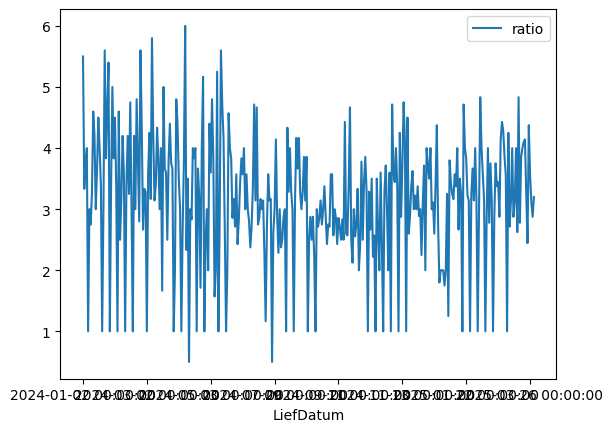

In [74]:
trucks_df.query("LiefDatum > '2024-01-01'").set_index('LiefDatum').sort_index()[['ratio']].plot()

In [75]:
trucks_df.query("LiefDatum > '2021-01-01'").set_index('LiefDatum').sort_index()[['ratio']].describe()

,ratio
count,1176.000000
mean,3.442726
std,1.046682
min,0.000000
25%,3.000000
50%,3.500000
75%,4.166667
max,7.600000
